In [1]:
# Import required Python package
!pip install snscrape
!pip install pyvis
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.9 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com

In [82]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from pyvis.network import Network
from IPython.core.display import display, HTML
import threading

In [81]:
def deg(c):
    deg_centrality = nx.degree_centrality(c)
    sorted_deg = dict(sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)[:5])
    print('DEGREE CENTRALITY')
    print(sorted_deg)

def clos(c):
    clos_centrality = nx.closeness_centrality(c)
    sorted_clos = dict(sorted(clos_centrality.items(), key=lambda x:x[1], reverse=True)[:7])
    print('CLOSENESS CENTRALITY')
    print(sorted_clos)

def bet(c):
    bet_centrality = nx.betweenness_centrality(c, normalized = True, endpoints = False)
    sorted_bet = dict(sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)[:5])
    print('BETWEENESS CENTRALITY')
    print(sorted_bet)

def eig(c):
    eig_centrality = nx.eigenvector_centrality(c, max_iter=1000)
    sorted_eig = dict(sorted(eig_centrality.items(), key=lambda x:x[1], reverse=True)[:5])
    print('EIGENVECTOR CENTRALITY')
    print(sorted_eig)

In [ ]:
# Crawl Data
# File to store the tweet harvest
filename = 'techbros.csv'

search_keyword = 'techbros since:2024-01-01'
limit = 1000

# Token can be found in your cookie as auth_token when you've logged in to Twitter.
!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token "240ee7b2cd1eb84d848b21e3ecf47327e07ff712"

In [72]:
import pandas as pd

filename = 'techbros.csv'

# Specify the path to your CSV file
file_path = f"{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df.head(10))

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1774738201313223155,Mon Apr 01 09:58:54 +0000 2024,360,Respect Lawyers. Respect Doctors. Respect Tech...,1774738201313223155,NaN,NaN,en,United States,36,61,101,https://twitter.com/JelaniMK/status/1774738201...,269831494,JelaniMK
1,1774502052623769983,Sun Mar 31 18:20:32 +0000 2024,32,Talking to Indian techbros be like Tag em in t...,1774502052623769983,https://pbs.twimg.com/ext_tw_video_thumb/17745...,NaN,en,"Miami, FL",0,4,2,https://twitter.com/ArcKau/status/177450205262...,971452550057623552,ArcKau
2,1774236170928677145,Sun Mar 31 00:44:01 +0000 2024,281,Designer sekalinya bakuhantam langsung sama ma...,1774236170928677145,NaN,NaN,in,Global,8,25,51,https://twitter.com/dadimdum/status/1774236170...,1104292046842474497,dadimdum
3,1774514494435148188,Sun Mar 31 19:09:59 +0000 2024,490,So COCOBOD bought those chinese keyboard from ...,1774514494435148188,https://pbs.twimg.com/media/GKBXhwRX0AAOhaP.jpg,NaN,en,"Accra, Ghana",66,93,247,https://twitter.com/StatsGH/status/17745144944...,2535269459,StatsGH
4,1773050333528252718,Wed Mar 27 18:11:55 +0000 2024,855,Nolan is a gimmicky filmmaker. He appeals to t...,1773050333528252718,NaN,NaN,en,Neo fascist nation.,190,108,82,https://twitter.com/asuph/status/1773050333528...,14448856,asuph
5,1775394558538662343,Wed Apr 03 05:27:02 +0000 2024,55,To techbros complaining about taxes: this very...,1775394558538662343,NaN,NaN,en,USDR,0,6,15,https://twitter.com/puram_politics/status/1775...,1513294208,puram_politics
6,1772882848975839368,Wed Mar 27 07:06:24 +0000 2024,21,Droughts are caused by weather and climate; fa...,1772882848975839368,NaN,NaN,en,Citizen of nowhere!,2,1,15,https://twitter.com/Makarand_S/status/17728828...,134792811,Makarand_S
7,1774302391246197134,Sun Mar 31 05:07:09 +0000 2024,8,So techbros are annoying to compensate lack of...,1774302391246197134,NaN,NaN,en,Malaysia.,0,3,4,https://twitter.com/hanimomo/status/1774302391...,17270760,hanimomo
8,1773692959642300686,Fri Mar 29 12:45:29 +0000 2024,21,Techbros with Audis are some of our biggest su...,1773692959642300686,https://pbs.twimg.com/media/GJ1sV3sXoAAHI15.jpg,NaN,en,NaN,0,0,0,https://twitter.com/LaikipiaRanches/status/177...,1341397841919488013,LaikipiaRanches
9,1774694948329148763,Mon Apr 01 07:07:02 +0000 2024,85,A startup should always aspire tỏ solve proble...,1774694948329148763,https://pbs.twimg.com/media/GKDz9UUWAAAwLHL.jpg,NaN,en,India,1,9,3,https://twitter.com/OnTheGrapevine/status/1774...,1448668972019171329,OnTheGrapevine


In [73]:
# Show how many rows of data are there before preprocessing
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 774.


In [74]:
# Preprocess the data
df = df[['username', 'in_reply_to_screen_name']].dropna()
df.drop_duplicates(inplace=True)

In [75]:
# Display the DataFrame
display(df.head(3))

,username,in_reply_to_screen_name
13,rabotsigah,StatsGH
18,HidayatTaufiqur,bongcoy_
32,MichaelEMann,MichaelEMann


In [76]:
# Show how many rows of data are there after preprocessing
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 328.


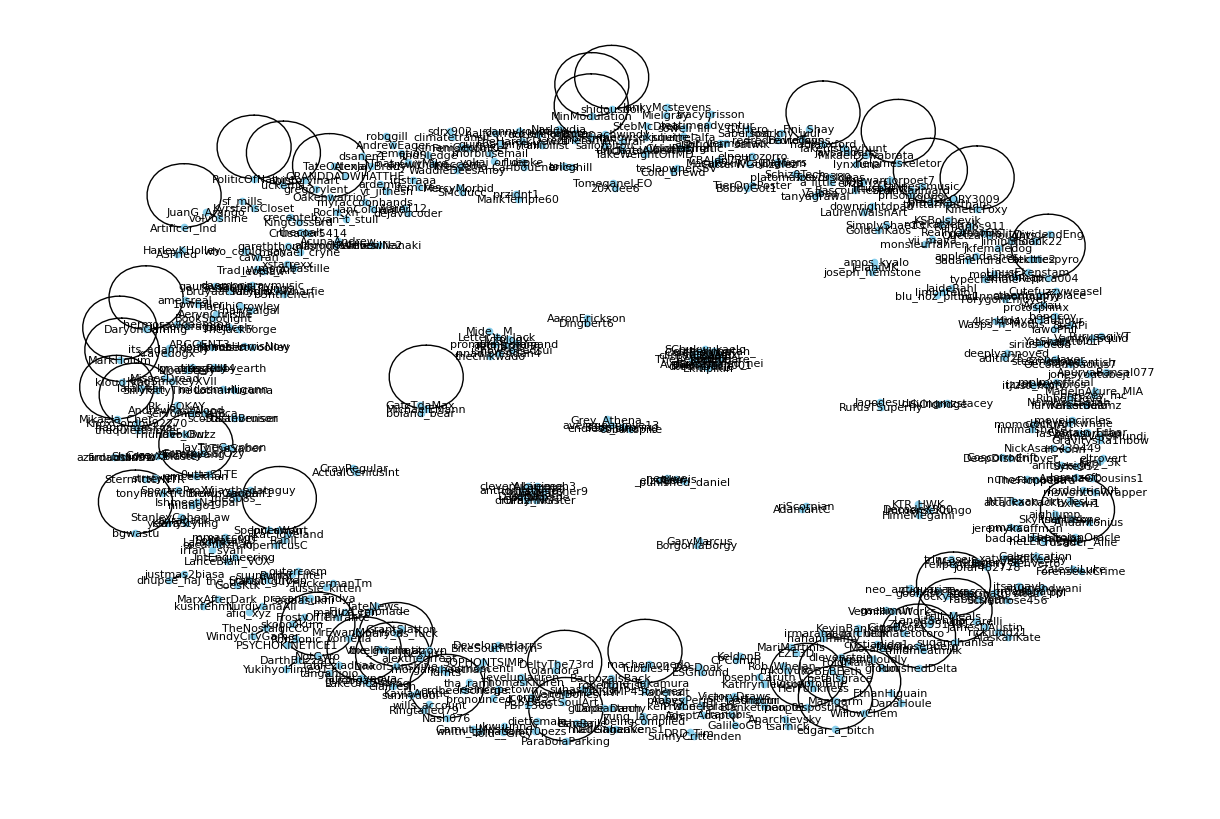

In [77]:
# Create graph
G = nx.from_pandas_edgelist(df, 'username', 'in_reply_to_screen_name')
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=20, node_color='skyblue', font_size=8)
plt.show()

In [78]:
# Apply Girvan-Newman algorithm
def girvan_newman_communities(G):
    comp = girvan_newman(G)
    communities = tuple(sorted(c) for c in next(comp))
    return communities

communities = girvan_newman_communities(G)


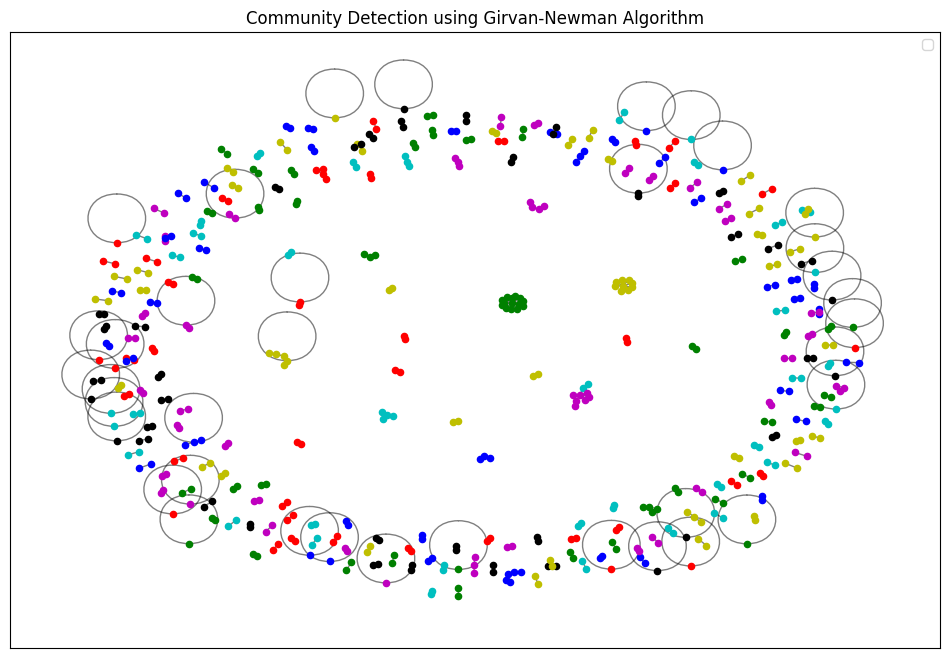

In [79]:
# Visualize communities
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, community, node_size=20, node_color=colors[i % len(colors)])
    # nx.draw_networkx_nodes(G, pos, community, node_size=25, node_color=colors[i % len(colors)])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Community Detection using Girvan-Newman Algorithm')
plt.legend()
plt.show()


In [80]:
# Print detected communities
i = 0
for i, community in enumerate(communities):
    # print(f"Community {i + 1}: {community}")
    i += 1

print(f"total communities: {i}")

total communities: 270


In [83]:
# Visualize the graph using pyvis
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

for node in G.nodes:
    net.add_node(node, label=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show_buttons(filter_=['physics'])
net.save_graph('network.html')

# Display the graph in Google Colab
# display(HTML('network.html'))

In [91]:
print("top 5 nodes by degree centrality:")
print(deg(G))

top 5 nodes by degree centrality:
DEGREE CENTRALITY
{'__Jaytech': 0.023423423423423424, '_kvngNath': 0.014414414414414415, 'TechBros_7': 0.010810810810810811, 'MichaelEMann': 0.007207207207207207, 'JonLamArt': 0.007207207207207207}
None


In [90]:
print("top 5 nodes by closeness centrality:")
print(clos(G))

top 5 nodes by closeness centrality:
CLOSENESS CENTRALITY
{'__Jaytech': 0.023423423423423424, '_kvngNath': 0.014414414414414415, 'SChukwukaelo': 0.01218018018018018, 'Ekitipikin': 0.01218018018018018, 'clinton_pase': 0.01218018018018018, 'darkskinned_nei': 0.01218018018018018, 'theoludare': 0.01218018018018018}
None


In [89]:
print("top 5 nodes by betweeness centrality:")
print(bet(G))

top 5 nodes by betweeness centrality:
BETWEENESS CENTRALITY
{'__Jaytech': 0.0005073665723485219, '_kvngNath': 0.00018213159007382835, 'TechBros_7': 0.0001691221907828406, 'nnadibrendan4': 4.553289751845709e-05, 'Letter_to_Jack': 4.553289751845709e-05}
None


In [92]:
print("top 5 nodes by eigen centrality:")
print(eig(G))

top 5 nodes by eigen centrality:
EIGENVECTOR CENTRALITY
{'__Jaytech': 0.7071064999402359, 'SChukwukaelo': 0.19611605697852688, 'Ekitipikin': 0.19611605697852688, 'clinton_pase': 0.19611605697852688, 'darkskinned_nei': 0.19611605697852688}
None
